<h1 align="center">
Tutorial for naruhodo: experimenting with the library in jupyter notebook
</h1>
<h1 align="center">
Naruhodo チュートリアル
</h1>
<BR>
    
Naruhodo is a python library for generating dependency-graph(DG) and knowledge-graph(KG) in `networkx` format from Japanese text or urls that contains Japanese texts. You can visualize these graphs directly in jupyter notebook or export graphs to JSON file for visualization using external programs.

----

Naruhodoは生の日本語テキスト・日本語テキストを含むWebページから`networkx`フォーマットの依存構造グラフ（DG）と情報構造グラフ（KG）を生成するためのPythonライブラリーです。Notebook内で直接可視化が可能で、JSONファィルに出力して外部プログラムに使わせる事も可能です。

In [1]:
# First import the naruhodo library
from naruhodo import DependencyAnalyzer, KnowledgeAnalyzer

## 1. Dependency graph(DG)

[Dependency parsing](https://web.stanford.edu/~jurafsky/slp3/14.pdf) is the analysis of [dependency grammar](https://en.wikipedia.org/wiki/Dependency_grammar) on a block of text using computer programs. 
The directed linking nature of dependency grammar makes the result of dependency parsing directed graphs.

Naruhodo generates denpendency graphs(DG) directly from the output of dependency parsing programs.

----

## 1. 依存構造グラフ（DG）

[依存構造解析](https://web.stanford.edu/~jurafsky/slp3/14.pdf)とは、 コンピュータプログラムで[依存文法](https://en.wikipedia.org/wiki/Dependency_grammar)に沿ってテキスト解析する事です。
依存構造は有向グラフで表す事ができます。

Naruhodoは依存構造解析プログラムの出力を直接読み込んでDGを生成します。

----

### 1A. Make a simple DG by adding text directly.

----

### 1A. テキストを追加してDGを生成

Fontconfig warning: ignoring UTF-8: not a valid region tag



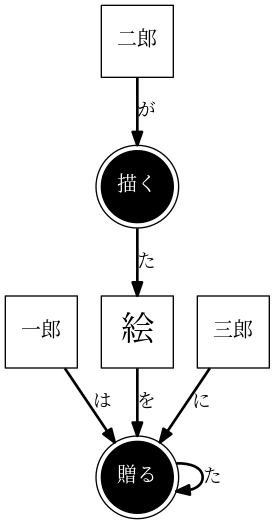

In [2]:
# Lets' instantialize a DependencyAnalyzer class
DA = DependencyAnalyzer()

# Now we can add some text to it
DA.addToDG("一郎は二郎が描いた絵を三郎に贈った。")

# Now lets' visulize
DA.plotDiGraphNotebook()

In DG, each node represents a "bunsetsu", the basic component of a sentence in Japanese. 

Different types of the bunsetsu is shaped differently. For example, squares represent nouns and black double circles represent verbs.

Edges represent dependency relationships and is labeled by the functional part of its corresponding node.

----

DGのノードは日本語の文の基本単位の”文節”です。

違う種類の文節はノードの形や色で表せます。例えば、四角形は名詞のノードで、二重ブラックサークルは動詞です。

エッジは文節間の依存関係を表しています。それぞれの文節の機能語がエッジのラベルになります。

Fontconfig warning: ignoring UTF-8: not a valid region tag



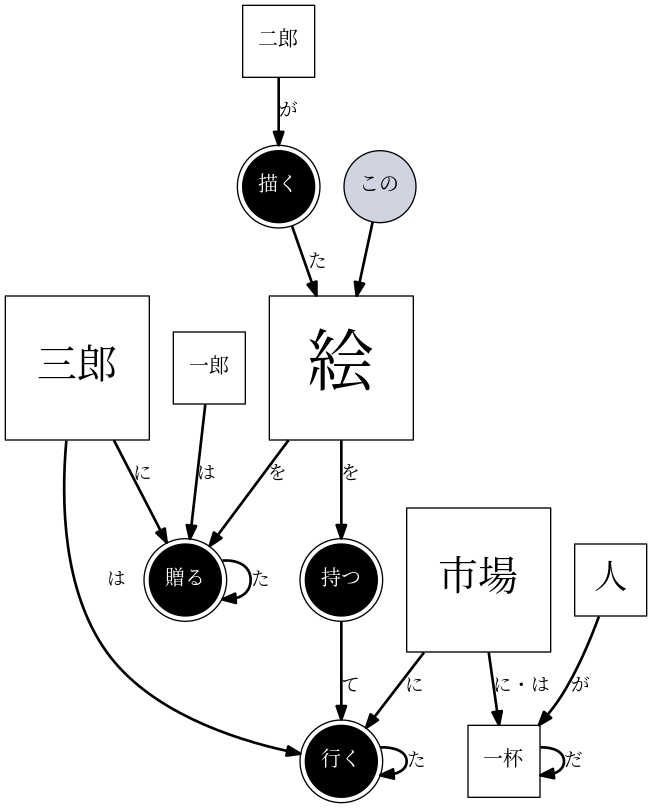

In [3]:
# You can add more texts to the graph.
DA.addToDG("三郎はこの絵を持って市場に行った。")
DA.addToDG("市場には人が一杯だ。")

# Now lets' visulize again
DA.plotDiGraphNotebook()

### 1B. Reset your graph

If you want to reset the graph you have created so far, you can use `reset` before adding new texts.

----

### 1B. グラフのリセット

生成したグラフをリセットしたい場合は`reset`を使います。

In [3]:
# Reset the graph.
DA.reset()

Fontconfig warning: ignoring UTF-8: not a valid region tag



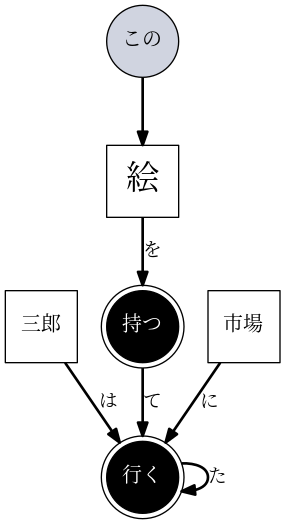

In [4]:
# Add some new text again.
DA.addToDG("三郎はこの絵を持って市場に行った。")

# Visualize
DA.plotDiGraphNotebook()

### 1C. Generating graph from a list of urls

You can also generate a graph directly from a list of urls.

But be noted that if the graph become too large because of the text contained by the webpages, **you might have performance issues to visualize your graph inside jupyter notebook.**

----

### 1C.　Webページのリンクからグラフを生成する

Webページのリンクからグラフを生成する事も可能です。

ただし、生成されたグラフが大きすぎる場合、Notebookでの可視化が失敗する恐れがあります。

Fontconfig warning: ignoring UTF-8: not a valid region tag



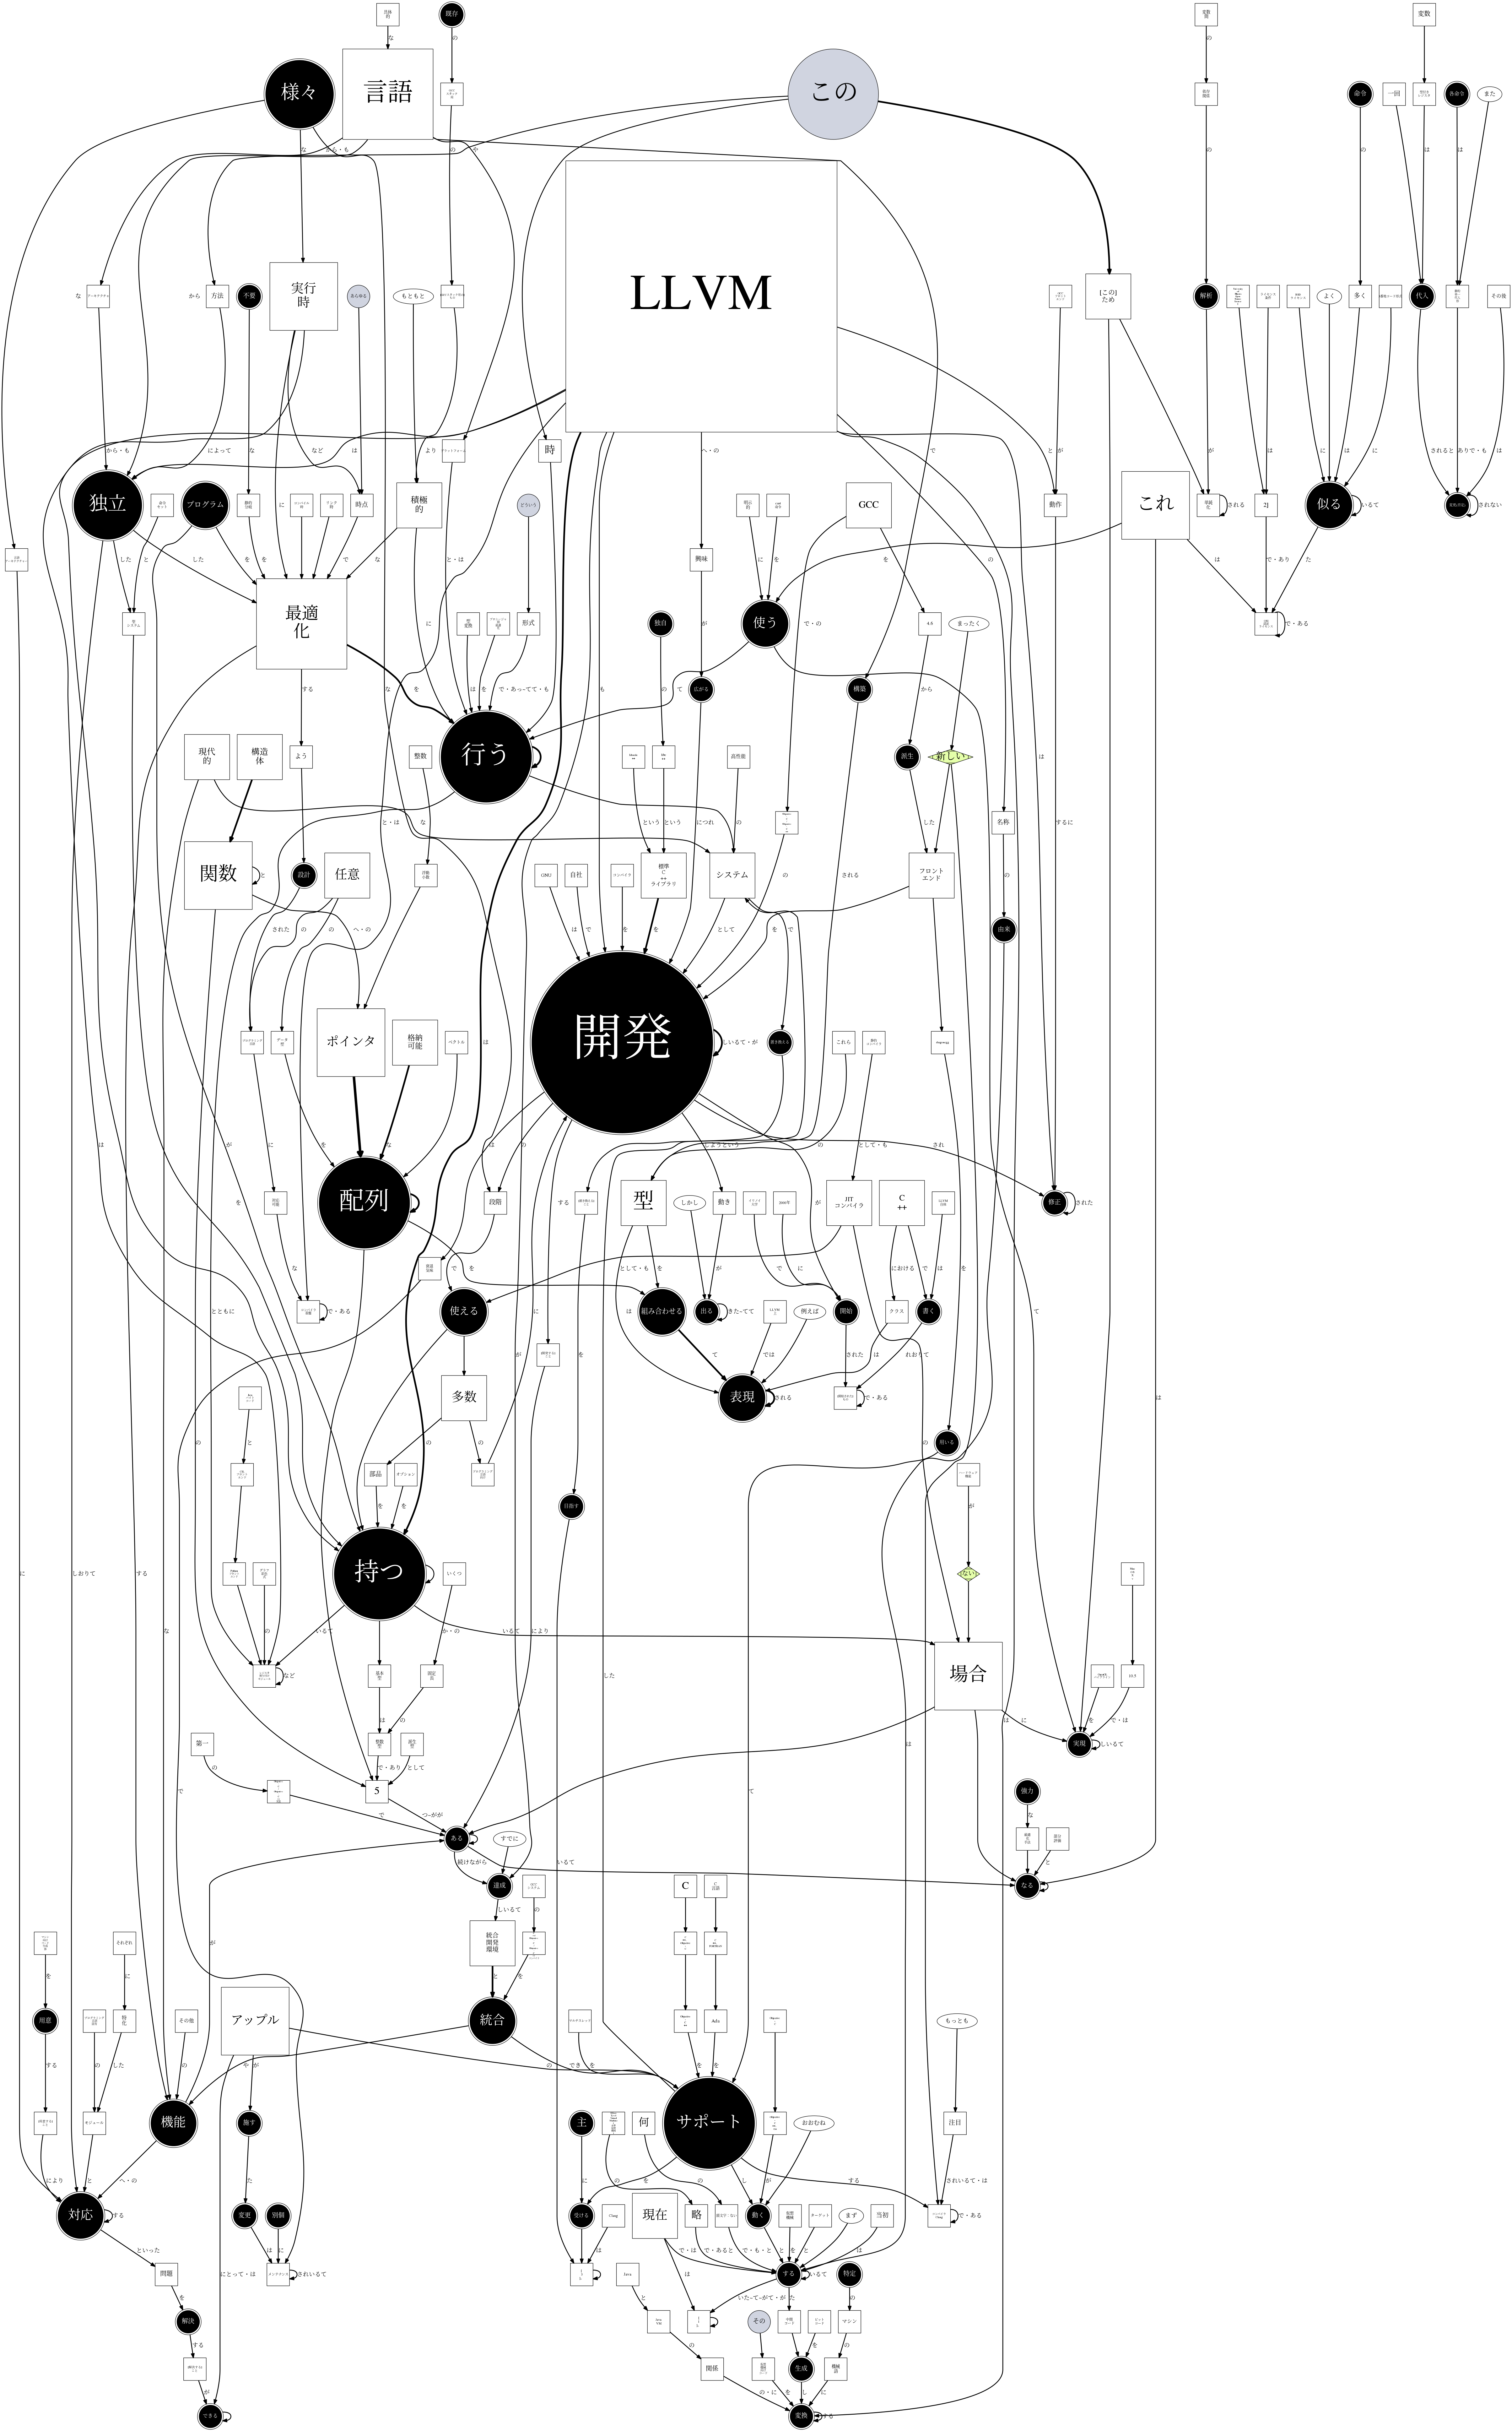

In [6]:
# Instantialize another DependencyAnalyzer
DA2 = DependencyAnalyzer()

# List of urls for graph generation
urls = ["https://ja.wikipedia.org/wiki/LLVM"]

# Add to DG
DA2.addUrlsToDG(urls)

# Visualize
DA2.plotDiGraphNotebook()

### 1D. Exporting your graph

You can export your graph to a JSON file for use with external programs.

----

### 1D.  グラフをファィルに出力する

生成したグラフはJSONファィルに出力して、外部のプログラムに使わせることが可能です。

In [5]:
# Export graph to JSON file.
DA.exportJSON("network.json")

It is also possible to export the image of your graph directly.

----

可視化の結果を直接画像ファィルに出力する事も可能です。

In [6]:
# Export graph to PNG image.
DA.plotDiGraph("network.png")

Fontconfig warning: ignoring UTF-8: not a valid region tag



'network.png'

## 2. Knowledge graph(KG)

Unlike DG, knowledge-graph(KG) tries to capture the meaningful relationship between different entities. KG is also generated from the output of dependency parsing programs, but the generation follows a different logic.

The methods available to KG is almost identical to those of DG. 

Let's look at some examples.

----

## 2. 情報構造グラフ（KG）

DGと違って、情報構造グラフ（KG）がキャプチャーしようとするのは実体の間の意味のある関係です。KGも外部の構造解析プログラムの出力から生成されますが、生成プロセスのロジックが違います。

KGで使えるメソッドはDGとほぼ同じです。

では実例を見て見ましょう。

In [2]:
# First instantialize a DG and a KG analyzer.
DA = DependencyAnalyzer()
KA = KnowledgeAnalyzer()

# Now prepare the text for graph generation.
texts = [
    "猫は象が怖い。", # Cat fears elephants.
    "象はネズミが怖い。", # Elephants fears mice.
    "ネズミは猫が怖い。" # Mice fears cats.
]

# Add texts to graphs.
for item in texts:
    DA.addToDG(item)
    KA.addToKG(item)

Let's compare the result of DG and KG.

----

それではDGとKGを比較して見ましょう。

Fontconfig warning: ignoring UTF-8: not a valid region tag



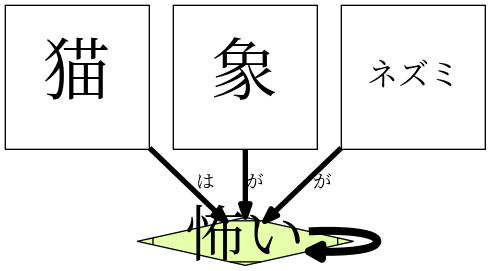

In [8]:
# visualize DG
DA.plotDiGraphNotebook()

As you can see, in DG the information of the looping "fears(怖い)" relationship is lost. It is impossible to tell which animal fears which in DG.

Let's look at KG instead.

----

見ての通り、DGでは”怖いループ”の情報が失われています。DGだけではどの動物がどの動物を恐れているかはまったく分かりません。

代わりにKGを見ましょう。

Fontconfig warning: ignoring UTF-8: not a valid region tag



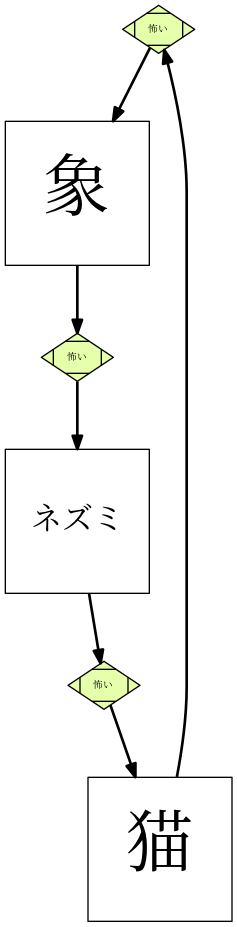

In [9]:
# visualize KG
KA.plotDiGraphNotebook()

Bravo!

KG successfully captures the information of animal fear loop. This makes KG more useful than DG in some cases.

Let's look at a more complex KG. You can compare it with DG generated from the same texts above. You should understand the difference between DG and KG by now.

----

どうですか？

KGは”怖いループ”の情報をちゃんとキャプチャーしている。だから場合によってはKGの方がDGより役立ちます。

もうちょっと複雑なKGを見てみましょう。前にはこれと同じテキストで生成したDGを作ったことがあります。二つのグラフを比較すれば、KGとDGの違いはもう少しわかるようになるでしょう。

Fontconfig warning: ignoring UTF-8: not a valid region tag



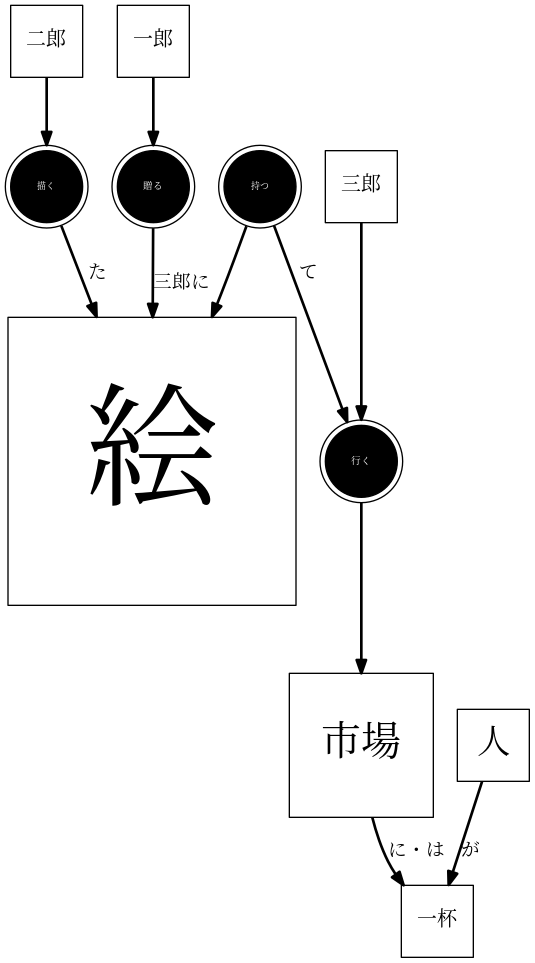

In [3]:
# reset KG
KA.reset()

# Add texts
KA.addToKG("一郎は二郎が描いた絵を三郎に贈った。")
KA.addToKG("三郎はこの絵を持って市場に行った。")
KA.addToKG("市場には人が一杯だ。")

# visualize KG
KA.plotDiGraphNotebook()

You can export KG to JSON file and image file as well.

----

KGもJSONやイメージファィルに出力できます。

In [4]:
# Export to JSON
KA.exportJSON("network_KG.json")

# Export to image
KA.plotDiGraph("network_KG.png")

Fontconfig warning: ignoring UTF-8: not a valid region tag



'network_KG.png'

The tutorial for naruhodo ends here. 

This library is still in development state(especially KG related part), so you might find it outputs weird results sometimes. If you like the idea and want to help improve the library, feel free to file a pull request on github.

----

チュートリアルはここで終わりです。

このライブラリーはまだ開発の途中（特にKG部分）なので、時々おかしなリザルトを返す事があると予想されます。

もしあなたもこのライブラリーのアイデアに気に入って、より良き物にしてほしいと思うなら、Githubリポのプルリクエストを出してください。

----

superkerokero
2018.02.14